<a href="https://colab.research.google.com/github/Hossain-Younis/MoodVision/blob/main/MoodVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import plotly.tools
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import BatchNormalization
from keras.utils import plot_model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate, Add
from keras.regularizers import l2

Pre-processing the datasets

In [ ]:
# Pre-processing facial expression
# Setting up Facial Expression path
expression_train = "/content/drive/MyDrive/Colab Notebooks/MoodVision/Facial Expression/Fer2013/train"
expression_test = "/content/drive/MyDrive/Colab Notebooks/MoodVision/Facial Expression/Fer2013/test"

# Defining a function to convert class names (strings) to numerical labels
def class_to_label(class_name):
    # Defining the new groups
    class_names = ["angry", "fear", "positive", "neutral", "sad"]

    # Mapping the original classes to the new groups
    if class_name in ["angry"]:
        return class_names.index("angry") + 2
    elif class_name == "fear":
        return class_names.index("fear") + 2
    elif class_name in ["happy", "surprise"]:
        return class_names.index("positive") + 2
    elif class_name == "neutral":
        return class_names.index("neutral") + 2
    elif class_name == "sad":
        return class_names.index("sad") + 2

# Creating NumPy arrays for training data
train_images = []
train_labels = []

# Looping through the directories
for class_name in os.listdir(expression_train):
    class_path = os.path.join(expression_train, class_name)
    if os.path.isdir(class_path):
        label = class_to_label(class_name)
        for image_file in os.listdir(class_path):
            if image_file.lower().endswith((".jpg", ".jpeg")):
                image_path = os.path.join(class_path, image_file)

                # Reading the images
                image = cv2.imread(image_path, 0)
                image = cv2.resize(image, (32, 32))

                # Normalizing Pixel Values
                exp_train_image = image / 255.0

                # Appending training images and labels
                train_images.append(exp_train_image)
                train_labels.append(label)


# Creating NumPy arrays for testing data
test_images = []
test_labels = []

# Looping  through the directories
for class_name in os.listdir(expression_test):
    class_path = os.path.join(expression_test, class_name)
    if os.path.isdir(class_path):
        label = class_to_label(class_name)
        for image_file in os.listdir(class_path):
            if image_file.endswith(".jpg"):
                image_path = os.path.join(class_path, image_file)

                # Reading the images and resizing
                image = cv2.imread(image_path, 0)
                image = cv2.resize(image, (32, 32))

                # Normalizing Pixel values
                exp_test_image = image / 255.0

                # Appending testing images and labels
                test_images.append(exp_test_image)
                test_labels.append(label)

# Converting lists to NumPy arrays
X_expression_train = np.array(train_images)
y_expression_train = np.array(train_labels)
X_expression_test = np.array(test_images)
y_expression_test = np.array(test_labels)

# Converting the labels to one-hot encoded
y_expression_train_onehot = to_categorical(y_expression_train - 2, num_classes=5)
y_expression_test_onehot = to_categorical(y_expression_test - 2, num_classes=5)

# Saving NumPy arrays separately
np.save('/content/drive/MyDrive/Colab Notebooks/MoodVision/X_expression_train.npy', X_expression_train)
np.save('/content/drive/MyDrive/Colab Notebooks/MoodVision/X_expression_test.npy', X_expression_test)
np.save('/content/drive/MyDrive/Colab Notebooks/MoodVision/y_expression_train.npy', y_expression_train_onehot)
np.save('/content/drive/MyDrive/Colab Notebooks/MoodVision/y_expression_test.npy', y_expression_test_onehot)

In [ ]:
# pre-processing gender part
# Setting the gender path
gender_path = "/content/drive/MyDrive/Colab Notebooks/MoodVision/Gender and Age/crop_part1"

# Initializing lists to store images and corresponding genders
gender_images = []
genders = []

# Looping through the images
for filename in os.listdir(gender_path):
    if filename.endswith(".jpg.chip.jpg"):
        # Reading the image
        img_path = os.path.join(gender_path, filename)
        img = cv2.imread(img_path, 0)

        # Resizing the image
        img = cv2.resize(img, (32, 32))

        # Normalizing Pixel values
        gender_img = img / 255.0

        # Extracting gender from the filename and convert to integer
        gender = int(filename.split('_')[1])

        # Appending the image and gender to the lists
        gender_images.append(gender_img)
        genders.append(gender)

# Spliting the dataset in to training part and testing part
X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(gender_images, genders, test_size=0.2)

# Cleaning and preprocessing gender labels
y_gender_train = [0 if label == 1 else 1 for label in y_gender_train]
y_gender_test = [0 if label == 1 else 1 for label in y_gender_test]

# Converting the labels to one-hot encoded
num_gender_groups = 2
y_gender_train_onehot = to_categorical(y_gender_train, num_gender_groups)
y_gender_test_onehot = to_categorical(y_gender_test, num_gender_groups)

# Saving the preprocessed data
np.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_gender_train.npy", X_gender_train)
np.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_gender_test.npy", X_gender_test)
np.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_gender_train.npy", y_gender_train_onehot)
np.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_gender_test.npy", y_gender_test_onehot)

In [ ]:
# Setting the age path to the UTKFace folder
age_path = "/content/drive/MyDrive/Colab Notebooks/MoodVision/Gender and Age/crop_part1"

# Initializing lists to store images and corresponding ages
age_images = []
ages = []

# Defining the age ranges
age_ranges = [(0, 2), (3, 9), (10, 19), (20, 29), (30, 39), (40, 49), (50, 59),
              (60, 69), (70, 79), (80, 116)]

# Function to convert age to age range starting from 7
def age_to_range(age):
    for i, age_range in enumerate(age_ranges):
        if age_range[0] <= age <= age_range[1]:
            return i + 7
    return len(age_ranges) - 1 + 7

# Looping through the images
for filename in os.listdir(age_path):
    if filename.endswith(".jpg.chip.jpg"):
        # Reading the image
        img_path = os.path.join(age_path, filename)
        img = cv2.imread(img_path, 0)

        # Resizing the image
        img = cv2.resize(img, (32, 32))

        # Normalizing images
        age_img = img / 255.0

        # Extracting age from the filename and converting to integer
        age = int(filename.split('_')[0])

        # Converting age to age range
        age = age_to_range(age)

        # Appending the image and age to the lists
        age_images.append(age_img)
        ages.append(age)

# Splitting in to train-test datasets
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(age_images, ages, test_size=0.2)

# Subtracting 7 from each element in y_age_train using list comprehension
y_age_train_adjusted = [age - 7 for age in y_age_train]

# Subtracting 7 from each element in y_age_test using list comprehension
y_age_test_adjusted = [age - 7 for age in y_age_test]

# Converting age ranges to one-hot encoding
num_age_groups = len(age_ranges)
y_age_train_onehot = to_categorical(y_age_train_adjusted, num_age_groups)
y_age_test_onehot = to_categorical(y_age_test_adjusted, num_age_groups)

# Saving the preprocessed data
np.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_age_train.npy", X_age_train)
np.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_age_test.npy", X_age_test)
np.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_age_train.npy", y_age_train_onehot)
np.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_age_test.npy", y_age_test_onehot)

Ploting datasets

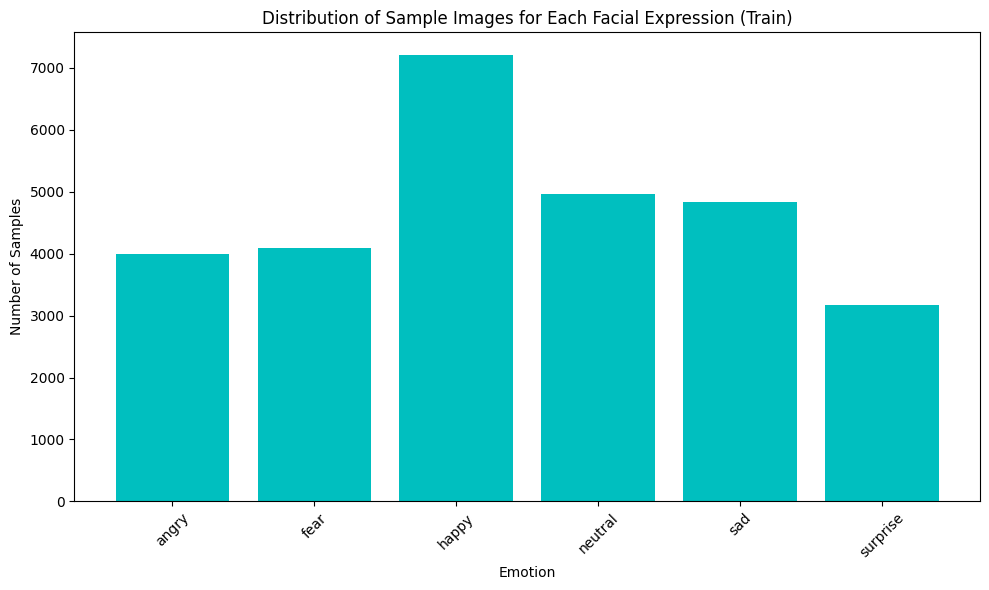

In [ ]:
# ploting the training dataset of Fer2013 dataset
# Defining the list of emotion categories
emotion_categories = ["angry", "fear", "happy", "neutral", "sad", "surprise"]

# Defining the path to the train dataset directory
train_dataset_dir = "/content/drive/MyDrive/Colab Notebooks/MoodVision/Facial Expression/Fer2013/train"

# Initializing a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotion_categories}

# Counting the number of samples for each emotion in the train dataset
for emotion in emotion_categories:
    emotion_train_dir = os.path.join(train_dataset_dir, emotion)
    num_samples = len(os.listdir(emotion_train_dir))
    emotion_counts[emotion] = num_samples

# Creating a bar graph
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='c')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.title('Distribution of Sample Images for Each Facial Expression (Train)')
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the graph
plt.show()

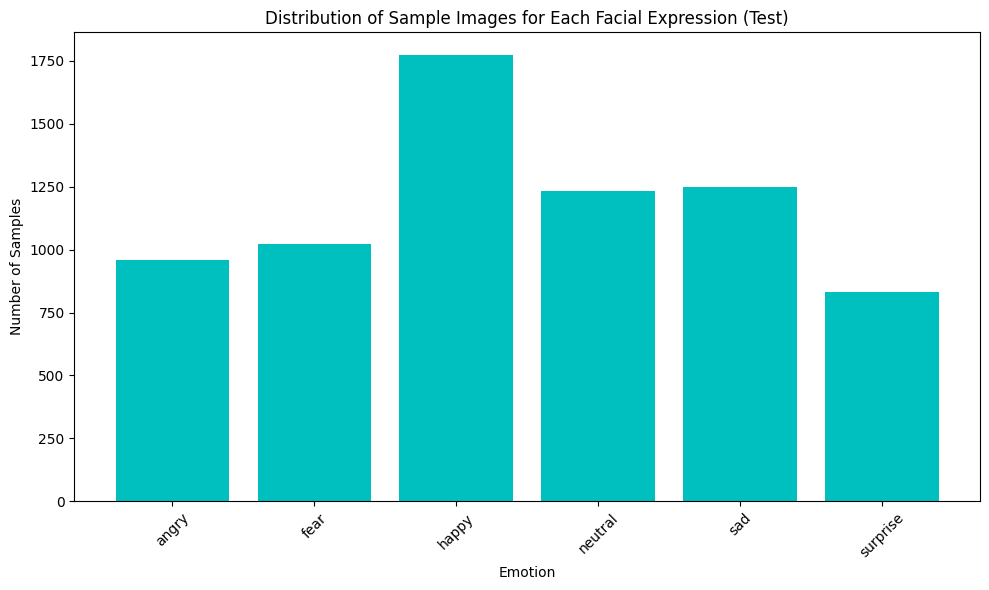

In [ ]:
#ploting the testing dataset of the Fer2013 dataset
# Defining the list of emotion categories
emotion_categories = ["angry", "fear", "happy", "neutral", "sad", "surprise"]

# Defining the path to the test dataset directory
test_dataset_dir = "/content/drive/MyDrive/Colab Notebooks/MoodVision/Facial Expression/Fer2013/test"

# Initializing a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotion_categories}

# Counting the number of samples for each emotion in the test dataset
for emotion in emotion_categories:
    emotion_test_dir = os.path.join(test_dataset_dir, emotion)
    num_samples = len(os.listdir(emotion_test_dir))
    emotion_counts[emotion] = num_samples

# Creating a bar graph
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='c')
plt.xlabel("Emotion")
plt.ylabel('Number of Samples')
plt.title('Distribution of Sample Images for Each Facial Expression (Test)')
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the the figure
plt.show()

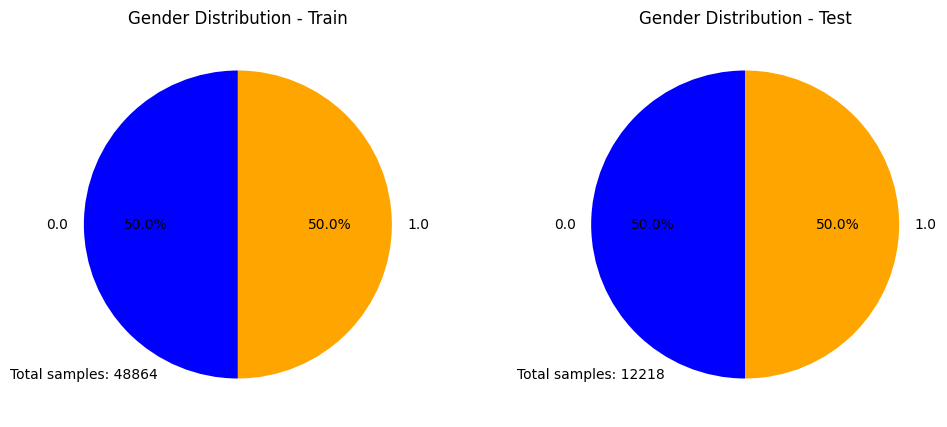

In [ ]:
# Creating pie charts for gender dataset
# Loading the label arrays
y_gender_train_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_gender_train.npy")
y_gender_test_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_gender_test.npy")

# Counting y_gender_train and y_gender_test in the gender labels
labels_train, counts_train = np.unique(y_gender_train_onehot, return_counts=True)
labels_test, counts_test = np.unique(y_gender_test_onehot, return_counts=True)

# Plotting pie chart for the training dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(counts_train, labels=labels_train, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Gender Distribution - Train')
plt.text(-1, -1, f'Total samples: {np.sum(counts_train)}', horizontalalignment='center')

# Plotting pie chart for the testing dataset
plt.subplot(1, 2, 2)
plt.pie(counts_test, labels=labels_test, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Gender Distribution - Test')
plt.text(-1, -1, f'Total samples: {np.sum(counts_test)}', horizontalalignment='center')

# Displaying the pie chart
plt.show()

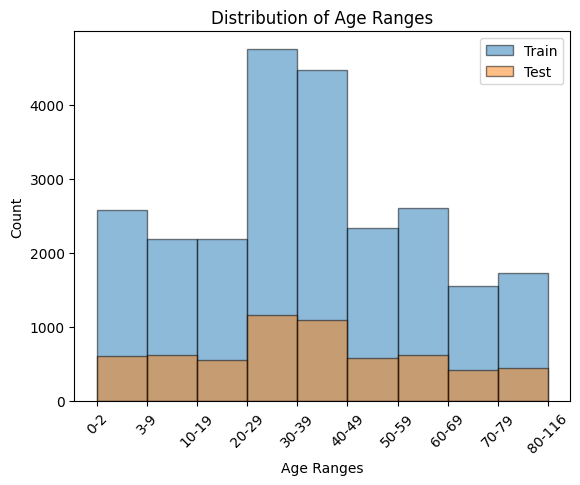

In [ ]:
# Loading the label arrays
y_age_train_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_age_train.npy")
y_age_test_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_age_test.npy")

# Converting one-hot encoded labels back to integer labels
y_age_train = np.argmax(y_age_train_onehot, axis=1) + 7
y_age_test = np.argmax(y_age_test_onehot, axis=1) + 7

# Defining the age range labels
age_range_labels = ["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-116"]

# Plotting the training and testing age data
# Creating two histograms for comparison
plt.hist(y_age_train, bins=np.arange(7, len(age_range_labels) + 7), alpha=0.5, label='Train', edgecolor='black')
plt.hist(y_age_test, bins=np.arange(7, len(age_range_labels) + 7), alpha=0.5, label='Test', edgecolor='black')
plt.title("Distribution of Age Ranges")
plt.xlabel("Age Ranges")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(7, len(age_range_labels) + 7), labels=age_range_labels, rotation=45)
plt.legend()
plt.show()

Unused Plotting Code Cell

In [ ]:
# Not using the the plotly figure cause it's just for show off lol
# Converting the Matplotlib figure to a Plotly figure
plotly_fig = plotly.tools.mpl_to_plotly(plt.gcf())

# Displaying the Plotly figure
plotly_fig.show()

Model architecture

In [2]:
# Defining input layers for expression, gender, and age
input_expression = Input(shape=(32, 32, 1), name='input_expression')
input_gender = Input(shape=(32, 32, 1), name='input_gender')
input_age = Input(shape=(32, 32, 1), name='input_age')

# ResNet-like block
def residual_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    # Shortcut
    shortcut = x

    # First convolution
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)

    # Second convolution
    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)

    # Adjusting the shortcut to match the main path
    shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same', kernel_regularizer=l2(0.001))(shortcut)

    # Adding shortcut to the main path
    x = Add()([x, shortcut])
    x = Activation(activation)(x)

    return x

# Using the residual block in the model

# Convolutional and Pooling Layers with L2 regularization for expression
conv1_expression = residual_block(input_expression, 32)
batch_norm1_expression = BatchNormalization()(conv1_expression)
activation1_expression = Activation('relu')(batch_norm1_expression)
max_pool1_expression = MaxPooling2D((2, 2))(activation1_expression)

conv2_expression = residual_block(max_pool1_expression, 64)
batch_norm2_expression = BatchNormalization()(conv2_expression)
activation2_expression = Activation('relu')(batch_norm2_expression)
max_pool2_expression = MaxPooling2D((2, 2))(activation2_expression)

conv3_expression = residual_block(max_pool2_expression, 128)
batch_norm3_expression = BatchNormalization()(conv3_expression)
activation3_expression = Activation('relu')(batch_norm3_expression)
max_pool3_expression = MaxPooling2D((2, 2))(activation3_expression)

# Convolutional and Pooling Layers with L2 regularization for gender
conv1_gender = residual_block(input_gender, 32)
batch_norm1_gender = BatchNormalization()(conv1_gender)
activation1_gender = Activation('relu')(batch_norm1_gender)
max_pool1_gender = MaxPooling2D((2, 2))(activation1_gender)

conv2_gender = residual_block(max_pool1_gender, 64)
batch_norm2_gender = BatchNormalization()(conv2_gender)
activation2_gender = Activation('relu')(batch_norm2_gender)
max_pool2_gender = MaxPooling2D((2, 2))(activation2_gender)

# Convolutional and Pooling Layers without ResNet-like block for age
conv1_age = Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.0001))(input_age)
batch_norm1_age = BatchNormalization()(conv1_age)
activation1_age = Activation('relu')(batch_norm1_age)
max_pool1_age = MaxPooling2D((2, 2))(activation1_age)

conv2_age = Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.0001))(max_pool1_age)
batch_norm2_age = BatchNormalization()(conv2_age)
activation2_age = Activation('relu')(batch_norm2_age)
max_pool2_age = MaxPooling2D((2, 2))(activation2_age)

conv3_age = Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.0001))(max_pool2_age)
batch_norm3_age = BatchNormalization()(conv3_age)
activation3_age = Activation('relu')(batch_norm3_age)
max_pool3_age = MaxPooling2D((2, 2))(activation3_age)

conv4_age = Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(0.0001))(max_pool3_age)
batch_norm4_age = BatchNormalization()(conv4_age)
activation4_age = Activation('relu')(batch_norm4_age)
max_pool4_age = MaxPooling2D((2, 2))(activation4_age)

# Concatenating the flattened feature maps
flatten_expression = Flatten()(max_pool3_expression)
flatten_gender = Flatten()(max_pool1_gender)
flatten_age = Flatten()(max_pool4_age)
merged = concatenate([flatten_expression, flatten_gender, flatten_age])

# Fully Connected Layer with L2 regularization
dense1 = Dense(2048, kernel_regularizer=l2(0.001))(merged)
batch_norm1 = BatchNormalization()(dense1)
activation1 = Activation('relu')(batch_norm1)
dropout1 = Dropout(0.3)(activation1)

dense2 = Dense(3570, kernel_regularizer=l2(0.001))(dropout1)
batch_norm2 = BatchNormalization()(dense2)
activation2 = Activation('relu')(batch_norm2)
dropout2 = Dropout(0.4)(activation2)

dense3 = Dense(3570, kernel_regularizer=l2(0.001))(dropout2)
batch_norm3 = BatchNormalization()(dense3)
activation3 = Activation('relu')(batch_norm3)
dropout3 = Dropout(0.3)(activation3)

# Creating a Sequential model
model = Model(inputs=[input_expression, input_gender, input_age], outputs=dropout3)

# Defining EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00000001)

# Displaying the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_expression (InputLay  [(None, 32, 32, 1)]          0         []                            
 er)                                                                                              
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 32)           320       ['input_expression[0][0]']    
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                              

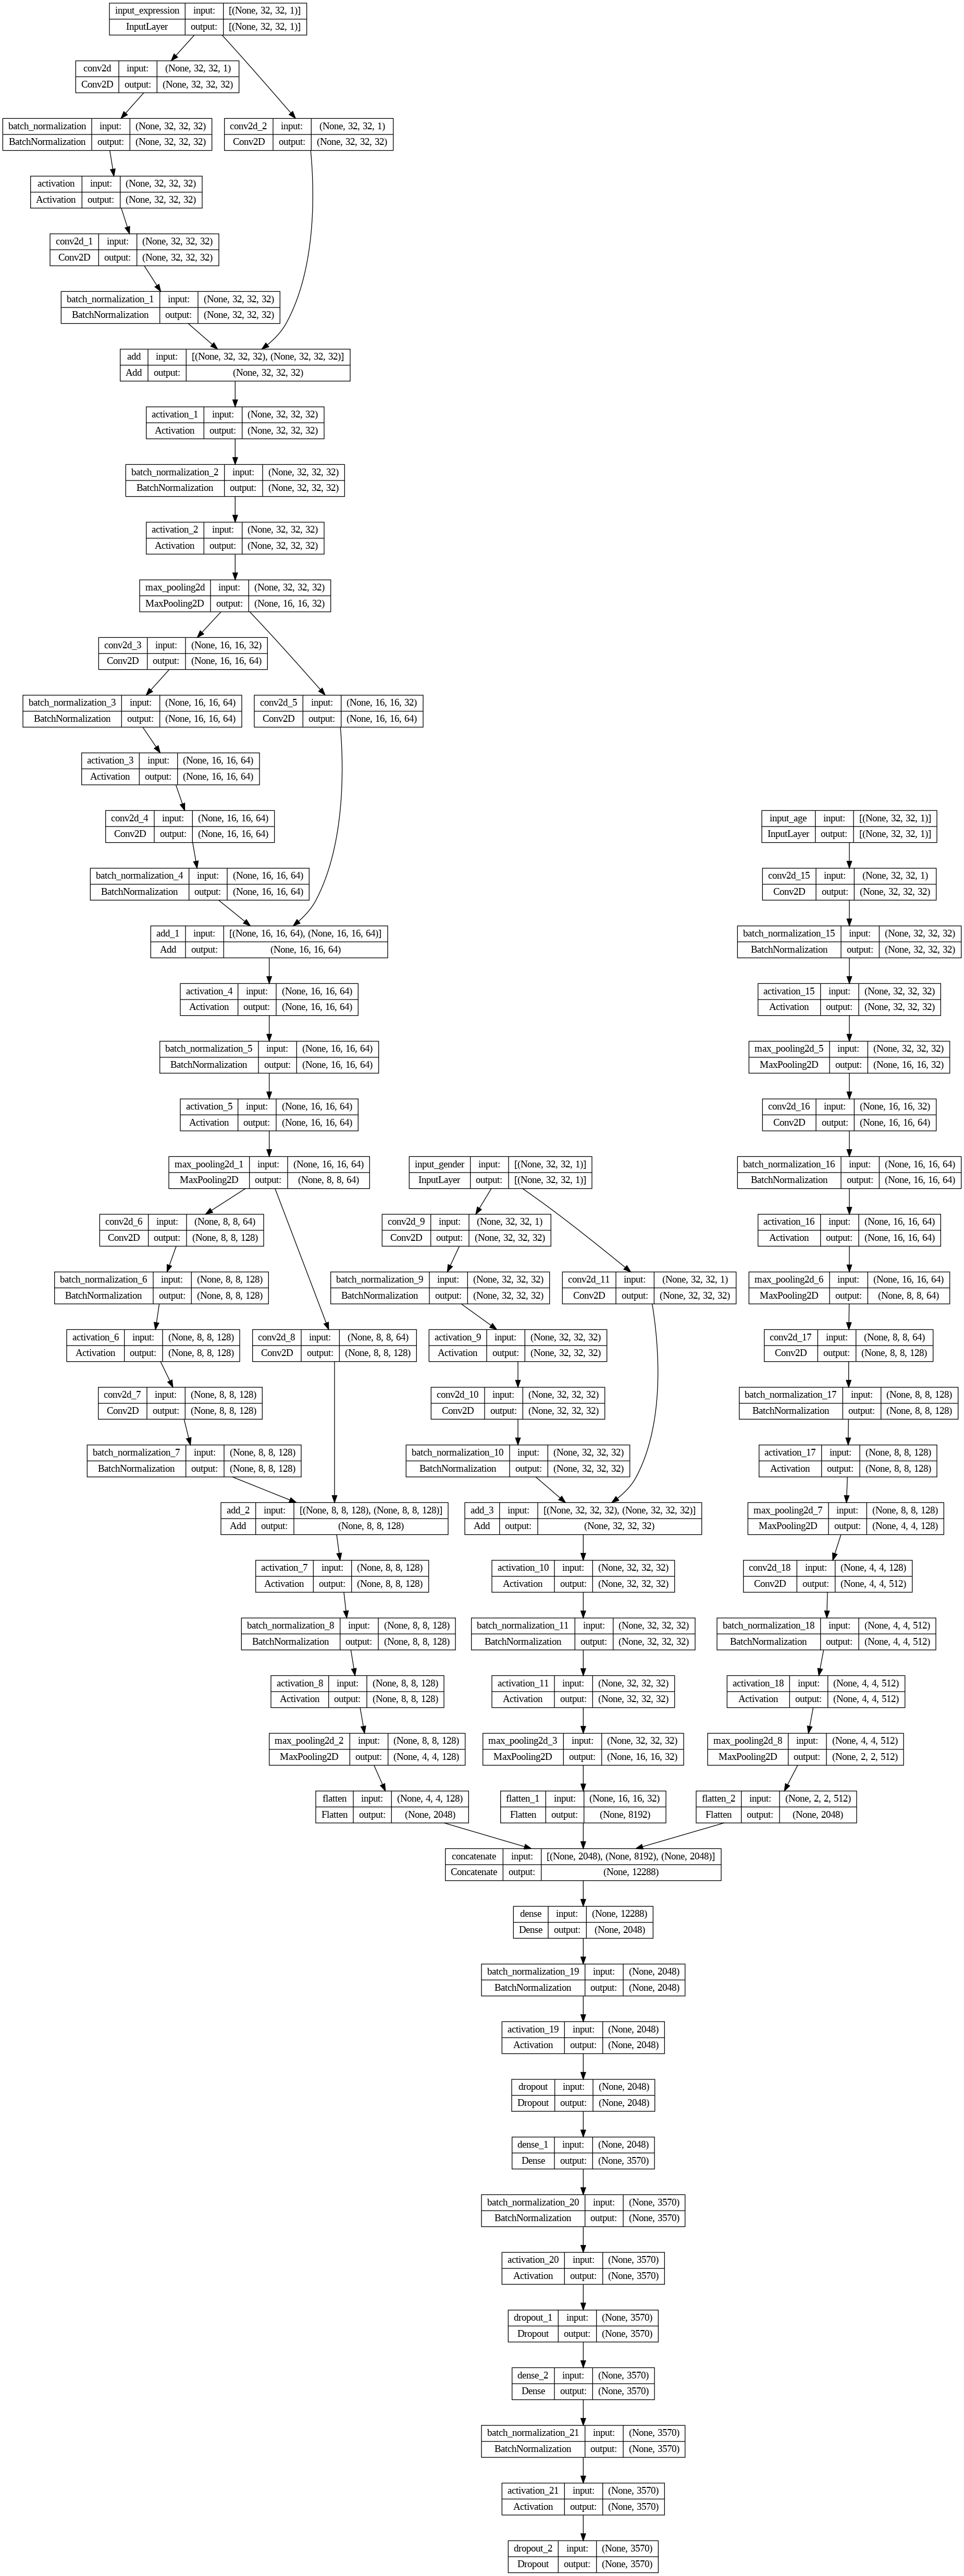

In [ ]:
# Creating a box plot with jitter
# Generating the model architecture plot
plot_model(model, show_shapes=True, show_layer_names=True, to_file='/content/drive/MyDrive/Colab Notebooks/MoodVision/MoodVision_architecture.png')

# Displaying the generated image inline
display(Image(filename='/content/drive/MyDrive/Colab Notebooks/MoodVision/MoodVision_architecture.png'))

In [3]:
# Output layers for facial expression classification
num_emotions = 5

# Converting the output layer to dense layer and connecting to the existing model
expression_output = Dense(num_emotions, activation='softmax', name='expression_output',
                          kernel_regularizer=l2(0.00001))(dropout2)

In [4]:
# Output layers for gender classification
num_genders = 2

# Converting the output layer to dense layer and connecting to the existing model
gender_output = Dense(num_genders, activation='sigmoid', name='gender_output',
                      kernel_regularizer=l2(0.01))(dropout1)

In [5]:
# Output layers for age classification
num_age_groups = 10

# Converting the output layer to dense layer and connecting to the existing model
age_output = Dense(num_age_groups, activation='softmax', name='age_output',
                  kernel_regularizer=l2(0.0000001))(dropout3)

In [6]:
# Creating the model with multiple outputs
model = Model(inputs=[input_expression, input_gender, input_age], outputs=[expression_output,
                                                                           gender_output,age_output])

In [7]:
# Compiling the model for both expression and gender
model.compile(optimizer='adam',
              loss={'expression_output': 'categorical_crossentropy',
                    'gender_output': 'binary_crossentropy',
                    'age_output':'categorical_crossentropy'},
              metrics={'expression_output': 'accuracy',
                       'gender_output': 'accuracy',
                       'age_output': 'accuracy'},
              )

Training the Testing the model with Datasets

In [8]:
# Loading the preprocessed training data for expression identification
X_expression_train = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_expression_train.npy")
y_expression_train_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_expression_train.npy")

# Loading the preprocessed training data for gender identification
X_gender_train = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_gender_train.npy")
y_gender_train_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_gender_train.npy")

# Loading the preprocessed training data for age identification
X_age_train = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_age_train.npy")
y_age_train_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_age_train.npy")

# Calculating the minimum size among the three datasets
min_size = min(len(X_expression_train), len(X_gender_train), len(X_age_train))

# Trimming the larger datasets to match the size of the smallest one
X_expression_train_trimmed = X_expression_train[:min_size]
y_expression_train_onehot_trimmed = y_expression_train_onehot[:min_size]
X_gender_train_trimmed = X_gender_train[:min_size]
y_gender_train_onehot_trimmed = y_gender_train_onehot[:min_size]
X_age_train_trimmed = X_age_train[:min_size]
y_age_train_onehot_trimmed = y_age_train_onehot[:min_size]

# Converting NumPy arrays to TensorFlow tensors
X_expression_train_tensor = tf.convert_to_tensor(X_expression_train_trimmed, dtype=tf.float32)
y_expression_train_onehot_tensor = tf.convert_to_tensor(y_expression_train_onehot_trimmed, dtype=tf.int32)
X_gender_train_tensor = tf.convert_to_tensor(X_gender_train_trimmed, dtype=tf.float32)
y_gender_train_onehot_tensor = tf.convert_to_tensor(y_gender_train_onehot_trimmed, dtype=tf.int32)
X_age_train_tensor = tf.convert_to_tensor(X_age_train_trimmed, dtype=tf.float32)
y_age_train_onehot_tensor = tf.convert_to_tensor(y_age_train_onehot_trimmed, dtype=tf.int32)

# Training expression, gender, and age
model.fit(
    [X_expression_train_tensor, X_gender_train_tensor, X_age_train_tensor],
    [y_expression_train_onehot_tensor, y_gender_train_onehot_tensor,
     y_age_train_onehot_tensor],
    epochs=40
)

Epoch 1/40
764/764 [==============================] - 53s 36ms/step - loss: 10.6516 - expression_output_loss: 1.8335 - gender_output_loss: 0.4660 - age_output_loss: 2.0975 - expression_output_accuracy: 0.3559 - gender_output_accuracy: 0.7863 - age_output_accuracy: 0.3177
Epoch 2/40
764/764 [==============================] - 26s 34ms/step - loss: 5.9260 - expression_output_loss: 1.4417 - gender_output_loss: 0.3955 - age_output_loss: 1.7483 - expression_output_accuracy: 0.4401 - gender_output_accuracy: 0.8186 - age_output_accuracy: 0.3964
Epoch 3/40
764/764 [==============================] - 27s 35ms/step - loss: 5.8457 - expression_output_loss: 1.3593 - gender_output_loss: 0.3698 - age_output_loss: 1.7457 - expression_output_accuracy: 0.4606 - gender_output_accuracy: 0.8335 - age_output_accuracy: 0.4452
Epoch 4/40
764/764 [==============================] - 27s 36ms/step - loss: 6.2488 - expression_output_loss: 1.3633 - gender_output_loss: 0.3604 - age_output_loss: 1.7751 - expression_ou

In [9]:
# Loading the preprocessed testing data for facial expression
X_expression_test = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_expression_test.npy")
y_expression_test_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_expression_test.npy")

# Loading the preprocessed testing data for gender
X_gender_test = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_gender_test.npy")
y_gender_test_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_gender_test.npy")

# Loading the preprocessed testing data for age
X_age_test = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/X_age_test.npy")
y_age_test_onehot = np.load("/content/drive/MyDrive/Colab Notebooks/MoodVision/y_age_test.npy")

# Calculating the minimum size among the three datasets
min_size_test = min(len(X_expression_test), len(X_gender_test), len(X_age_test))

# Trimming the larger datasets to match the size of the smallest one
X_expression_test_trimmed = X_expression_test[:min_size_test]
y_expression_test_onehot_trimmed = y_expression_test_onehot[:min_size_test]
X_gender_test_trimmed = X_gender_test[:min_size_test]
y_gender_test_onehot_trimmed = y_gender_test_onehot[:min_size_test]
X_age_test_trimmed = X_age_test[:min_size_test]
y_age_test_onehot_trimmed = y_age_test_onehot[:min_size_test]

# Converting NumPy arrays to TensorFlow tensors
X_expression_test_tensor = tf.convert_to_tensor(X_expression_test_trimmed, dtype=tf.float32)
y_expression_test_onehot_tensor = tf.convert_to_tensor(y_expression_test_onehot_trimmed, dtype=tf.int32)
X_gender_test_tensor = tf.convert_to_tensor(X_gender_test_trimmed, dtype=tf.float32)
y_gender_test_onehot_tensor = tf.convert_to_tensor(y_gender_test_onehot_trimmed, dtype=tf.float32)
X_age_test_tensor = tf.convert_to_tensor(X_age_test_trimmed, dtype=tf.float32)
y_age_test_onehot_tensor = tf.convert_to_tensor(y_age_test_onehot_trimmed, dtype=tf.int32)

# Evaluating the model for facial expression, gender, and age using the test dataset
evaluation = model.evaluate(
    [X_expression_test_tensor, X_gender_test_tensor, X_age_test_tensor],
    [y_expression_test_onehot_tensor, y_gender_test_onehot_tensor, y_age_test_onehot_tensor],
    batch_size = 8
)

# Extracting the loss and accuracy for facial expression and gender from the evaluation result
expression_loss, gender_loss,age_loss, expression_accuracy, gender_accuracy, age_accuracy = evaluation[1:7]

# Printing the facial expression evaluation results
print(f"Facial Expression Test Loss: {expression_loss:.4f}")
print(f"Facial Expression Test Accuracy: {expression_accuracy * 100:.2f}%")

# Printing the gender evaluation results
print(f"Gender Test Loss: {gender_loss:.4f}")
print(f"Gender Test Accuracy: {gender_accuracy * 100:.2f}%")

# Printing the age evaluation results
print(f"Age Test Loss: {age_loss:.4f}")
print(f"Age Test Accuracy: {age_accuracy * 100:.2f}%")

# Predicting the test labels for facial expression, gender, and age
expression_predictions, gender_predictions, age_predictions = model.predict([X_expression_test_tensor, X_gender_test_tensor, X_age_test_tensor])

# Converting one-hot encoded labels back to categorical labels
y_expression_test = np.argmax(y_expression_test_onehot_trimmed, axis=1)
y_gender_test = np.argmax(y_gender_test_onehot_trimmed, axis=1)
y_age_test = np.argmax(y_age_test_onehot_trimmed, axis=1)

# Calculating evaluation metrics for facial expression
expression_precision = precision_score(y_expression_test, np.argmax(expression_predictions, axis=1), average='weighted')
expression_recall = recall_score(y_expression_test, np.argmax(expression_predictions, axis=1), average='weighted')
expression_f1_score = f1_score(y_expression_test, np.argmax(expression_predictions, axis=1), average='weighted')

# Calculating evaluation metrics for gender
gender_precision = precision_score(y_gender_test, np.argmax(gender_predictions, axis=1), average='weighted')
gender_recall = recall_score(y_gender_test, np.argmax(gender_predictions, axis=1), average='weighted')
gender_f1_score = f1_score(y_gender_test, np.argmax(gender_predictions, axis=1), average='weighted')

# Calculating evaluation metrics for age
age_precision = precision_score(y_age_test, np.argmax(age_predictions, axis=1), average='weighted')
age_recall = recall_score(y_age_test, np.argmax(age_predictions, axis=1), average='weighted')
age_f1_score = f1_score(y_age_test, np.argmax(age_predictions, axis=1), average='weighted')

# Printing the facial expression evaluation metrics
print(f"Facial Expression Precision: {expression_precision:.4f}")
print(f"Facial Expression Recall: {expression_recall:.4f}")
print(f"Facial Expression F1 Score: {expression_f1_score:.4f}\n")

# Printing the gender evaluation results
print(f"Gender Precision: {gender_precision:.4f}")
print(f"Gender Recall: {gender_recall:.4f}")
print(f"Gender F1 Score: {gender_f1_score:.4f}\n")

# Printing the age evaluation metrics
print(f"Age Precision: {age_precision:.4f}")
print(f"Age Recall: {age_recall:.4f}")
print(f"Age F1 Score: {age_f1_score:.4f}\n")

764/764 [==============================] - 7s 7ms/step - loss: 4.5472 - expression_output_loss: 1.6293 - gender_output_loss: 0.5691 - age_output_loss: 1.2715 - expression_output_accuracy: 0.5348 - gender_output_accuracy: 0.8137 - age_output_accuracy: 0.6585
Facial Expression Test Loss: 1.6293
Facial Expression Test Accuracy: 53.48%
Gender Test Loss: 0.5691
Gender Test Accuracy: 81.37%
Age Test Loss: 1.2715
Age Test Accuracy: 65.85%
191/191 [==============================] - 2s 8ms/step
Facial Expression Precision: 0.5399
Facial Expression Recall: 0.5348
Facial Expression F1 Score: 0.5268

Gender Precision: 0.8366
Gender Recall: 0.8137
Gender F1 Score: 0.8113

Age Precision: 0.6664
Age Recall: 0.6585
Age F1 Score: 0.6601



Plotting training and testing Information

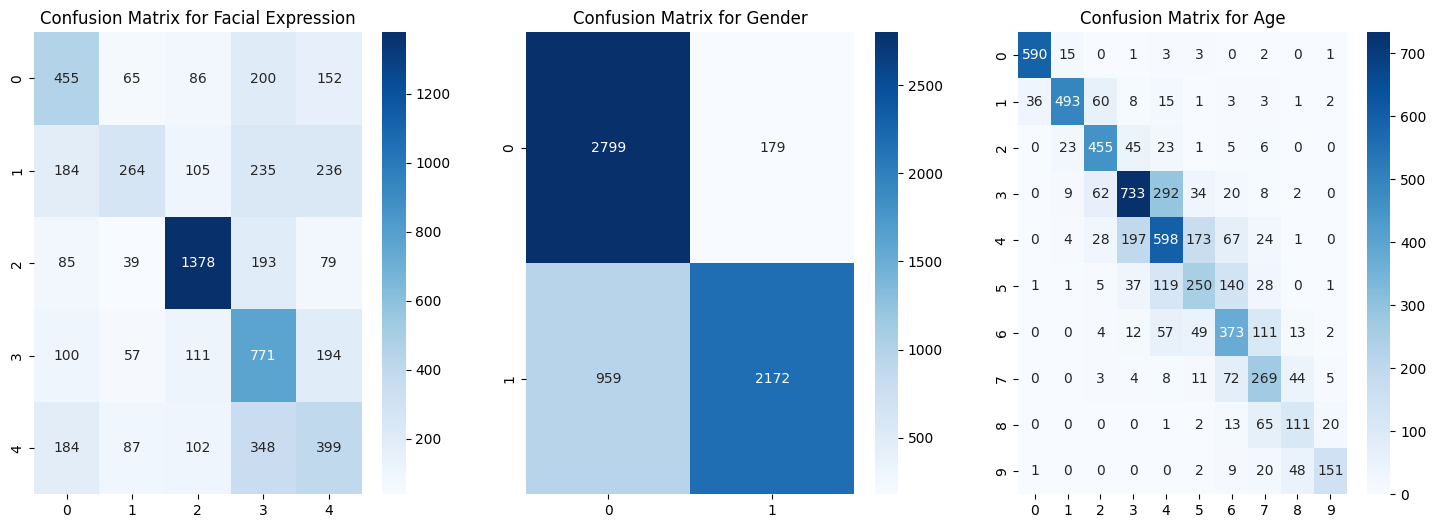

In [10]:
# Creating Confusion Matrix
# Converting predictions to categorical labels
expression_predictions_categorical = np.argmax(expression_predictions, axis=1)
gender_predictions_categorical = np.argmax(gender_predictions, axis=1)
age_predictions_categorical = np.argmax(age_predictions, axis=1)

# Creating confusion matrices
expression_cm = confusion_matrix(y_expression_test, expression_predictions_categorical)
gender_cm = confusion_matrix(y_gender_test, gender_predictions_categorical)
age_cm = confusion_matrix(y_age_test, age_predictions_categorical)

# Plotting the confusion matrices
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(expression_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Facial Expression')

plt.subplot(1, 3, 2)
sns.heatmap(gender_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gender')

plt.subplot(1, 3, 3)
sns.heatmap(age_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Age')

plt.show()

Saving the trained model

In [11]:
# Saving the model with ".h5" format
model.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/MoodVision.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [12]:
# Saving the model with ".keras" format
model.save("/content/drive/MyDrive/Colab Notebooks/MoodVision/MoodVision.keras")